# Machine Learning Project
Data Analyst Job Market: Machine Learning Project
By: Khushi Malik
Tools: Machine Learning, Python, SQL, Excel
Domain: Financial Analytics
Difficulty Level: Intermediate

# Introduction
In the wake of the pandemic, the global job market shifted dramatically—millions were left jobless, and uncertainty loomed large. This project dives deep into a dataset of over 2000 data analyst job listings, created by picklesueat, with a mission to help streamline job searches and unlock hiring trends.

# Problem statement
"Given a dataset of Data Analyst job postings, how can we identify key trends in hiring, predict salary expectations based on job and company features, and offer strategic insights into employer attractiveness and location-based demand?”

This breaks into three core questions:

 Which job roles, locations, and companies dominate the hiring space?

How do company rating and job location impact average salaries?

Can we predict the salary range of a Data Analyst job based on its attributes?

# Objectives
Analyze hiring trends by location, company, job title, salary, and rating

Build a machine learning model to predict salary ranges

Provide strategic insights into:

Company branding and reputation

Salary competitiveness

Location-based demand

# Impact
For Employers:

Refine salary benchmarking

Enhance employer branding

Optimize job postings for better reach

For Job Seekers:

Understand the market better

Gain confidence in salary negotiations

Apply strategically to companies and locations that align with goals

# Methodology: Step-by-Step Approach
1. Data Collection Source:
this  dataset is alredy given to me for internship.

2. Data Understanding
Perform an initial scan of the dataset: dimensions, column names, data types.

Identify target variable (e.g., Salary Estimate) and relevant features (e.g., Location, Company Rating, Industry, etc.).

3. Data Cleaning
Handle missing values and nulls

Standardize salary fields (remove special characters, convert ranges to averages)

Remove or unify inconsistent categorical values (e.g., “New York, NY” vs “NYC”)

Extract skills or keywords from Job Description using NLP if needed

4. Exploratory Data Analysis (EDA)
Visualize trends:

Top hiring locations

Most active companies

Salary distribution across roles/locations

Correlation between ratings and salaries

Use plots: histograms, bar charts, box plots, heatmaps

5. Feature Engineering
Extract features:

Experience Level from Job Description

Industry Type or Revenue Bucket

Create dummy variables for categorical data (one-hot encoding)

Normalize numerical features if needed

6. Model Building
Objective: Predict salary range or average salary

Use ML models:

Linear Regression

Random Forest Regressor

XGBoost (optional for advanced accuracy)

Split into train/test sets, evaluate using MAE, RMSE, R² Score

7. Insights & Recommendations
Top industries and companies offering high salaries

Skills most in demand

Locations with the highest-paying roles

Tips for job seekers based on the data

8. Conclusion & Impact
Wrap up the findings

Describe practical applications for:

Job seekers 

Employers

Career counselors

# data cleaning

In [33]:
import pandas as pd

#  dataset Loading
file_path = "job_data_data_analyst.csv"
df = pd.read_csv(file_path)

# Displaying of  basic info 
df_info = df.info()
df_head = df.head()
df_nulls = df.isnull().sum()

df_info, df_head, df_nulls


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

(None,
    Unnamed: 0                                          Job Title  \
 0           0  Data Analyst, Center on Immigration and Justic...   
 1           1                               Quality Data Analyst   
 2           2  Senior Data Analyst, Insights & Analytics Team...   
 3           3                                       Data Analyst   
 4           4                             Reporting Data Analyst   
 
               Salary Estimate  \
 0  $37K-$66K (Glassdoor est.)   
 1  $37K-$66K (Glassdoor est.)   
 2  $37K-$66K (Glassdoor est.)   
 3  $37K-$66K (Glassdoor est.)   
 4  $37K-$66K (Glassdoor est.)   
 
                                      Job Description  Rating  \
 0  Are you eager to roll up your sleeves and harn...     3.2   
 1  Overview\n\nProvides analytical and technical ...     3.8   
 2  We’re looking for a Senior Data Analyst who ha...     3.4   
 3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
 4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a 

# 1. Which job roles, locations, and companies dominate the hiring space?

# Top 10 In-Demand Job Titles

C:\Users\khush\AppData\Local\Temp\ipykernel_16624\2754227971.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="crest")


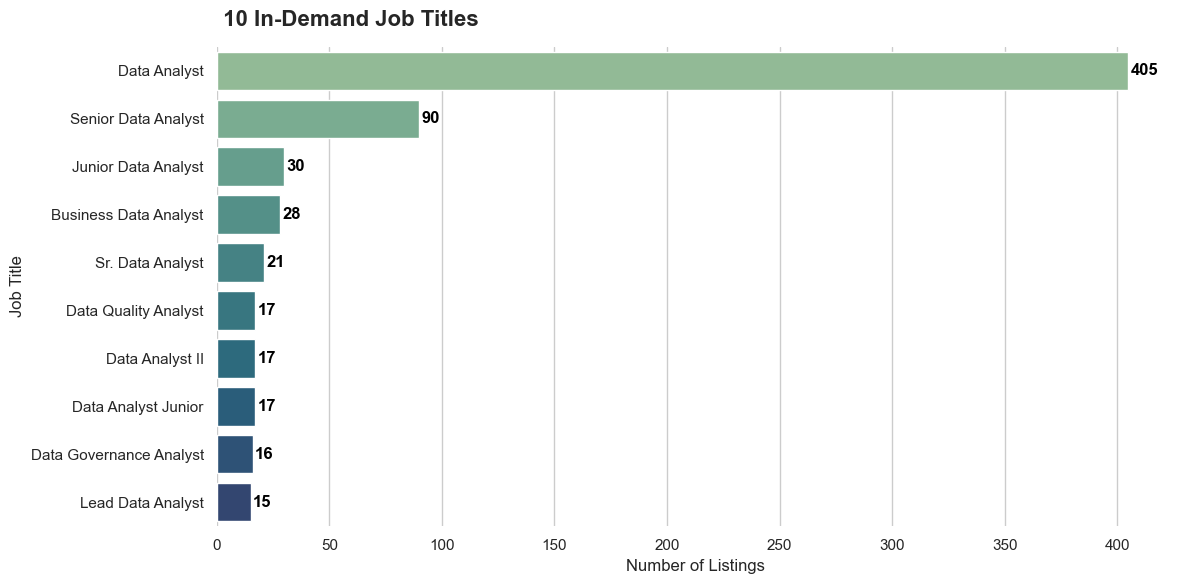

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting of style
sns.set(style="whitegrid")

# Data
top_jobs = df['Job Title'].value_counts().head(10)

#  figure and axis
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="crest")

# Title & Labels
plt.title(" 10 In-Demand Job Titles", fontsize=16, weight='bold', loc='left', pad=15)
plt.xlabel("Number of Listings", fontsize=12)
plt.ylabel("Job Title", fontsize=12)

#  count labels next to bars
for i, v in enumerate(top_jobs.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')

# Final result
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [35]:
# 1. Droping of  'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

# 2. Cleaning 'Company Name' - removing of  trailing rating (e.g., '\n3.2')
df['Company Name'] = df['Company Name'].str.replace(r'\n\d\.\d$', '', regex=True)

# 3. Cleaning of  'Salary Estimate'
# Removing of  '(Glassdoor est.)', '$', 'K', 'per hour', etc.
df['Salary Estimate Cleaned'] = df['Salary Estimate'].str.replace(r'\(.*\)', '', regex=True)
df['Salary Estimate Cleaned'] = df['Salary Estimate Cleaned'].str.replace('$', '', regex=False)
df['Salary Estimate Cleaned'] = df['Salary Estimate Cleaned'].str.replace('K', '', regex=False)
df['Salary Estimate Cleaned'] = df['Salary Estimate Cleaned'].str.replace(' ', '', regex=False)
df['Salary Estimate Cleaned'] = df['Salary Estimate Cleaned'].str.replace('PerHour', '', regex=False)
df['Salary Estimate Cleaned'] = df['Salary Estimate Cleaned'].str.replace('perhour', '', regex=False)
df['Salary Estimate Cleaned'] = df['Salary Estimate Cleaned'].str.replace('EmployerProvidedSalary:', '', regex=False)

# Converting of  range to min, max, avg salary
def extract_salary_range(sal):
    try:
        parts = sal.split('-')
        if len(parts) == 2:
            min_sal = int(parts[0])
            max_sal = int(parts[1])
            avg_sal = (min_sal + max_sal) // 2
            return pd.Series([min_sal, max_sal, avg_sal])
    except:
        return pd.Series([None, None, None])

df[['Min Salary (K)', 'Max Salary (K)', 'Avg Salary (K)']] = df['Salary Estimate Cleaned'].apply(extract_salary_range)

# 4. Replacing of  '-1' with None in applicable columns
columns_to_clean = ['Easy Apply', 'Competitors']
for col in columns_to_clean:
    df[col] = df[col].replace('-1', None)

# 5. Handling of  missing 'Company Name' value by filling it with 'Unknown'
df['Company Name'].fillna('Unknown', inplace=True)

# Displaying of  cleaned sample
df[['Company Name', 'Salary Estimate', 'Min Salary (K)', 'Max Salary (K)', 'Avg Salary (K)', 'Easy Apply', 'Competitors']].head()


C:\Users\khush\AppData\Local\Temp\ipykernel_16624\764341035.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Company Name'].fillna('Unknown', inplace=True)


,Company Name,Salary Estimate,Min Salary (K),Max Salary (K),Avg Salary (K),Easy Apply,Competitors
0,Vera Institute of Justice,$37K-$66K (Glassdoor est.),37.0,66.0,51.0,True,None
1,Visiting Nurse Service of New York,$37K-$66K (Glassdoor est.),37.0,66.0,51.0,None,None
2,Squarespace,$37K-$66K (Glassdoor est.),37.0,66.0,51.0,None,GoDaddy
3,Celerity,$37K-$66K (Glassdoor est.),37.0,66.0,51.0,None,None
4,FanDuel,$37K-$66K (Glassdoor est.),37.0,66.0,51.0,True,DraftKings


In [36]:
import numpy as np

# 1. Split 'Location' and 'Headquarters' into City and State
df[['Job City', 'Job State']] = df['Location'].str.split(pat=',', n=1, expand=True)
df[['HQ City', 'HQ State']] = df['Headquarters'].str.split(pat=',', n=1, expand=True)

# Strip whitespace
df['Job City'] = df['Job City'].str.strip()
df['Job State'] = df['Job State'].str.strip()
df['HQ City'] = df['HQ City'].str.strip()
df['HQ State'] = df['HQ State'].str.strip()

# 2. Clean 'Job Description' and extract skill mentions
skills = ['Python', 'Excel', 'SQL', 'R', 'Tableau', 'Power BI', 'Machine Learning']
for skill in skills:
    df[f'Skill_{skill}'] = df['Job Description'].str.contains(skill, case=False, na=False)

# 3. Clean categorical fields
categorical_columns = ['Size', 'Revenue', 'Type of ownership', 'Industry', 'Sector']
for col in categorical_columns:
    df[col] = df[col].replace('-1', np.nan).str.strip()

# 4. Convert 'Rating' to float
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Preview the cleaned dataset
df[['Location', 'Job City', 'Job State', 'Headquarters', 'HQ City', 'HQ State', 
    'Rating', 'Size', 'Revenue', 'Type of ownership', 'Industry', 'Sector'] + 
   [f'Skill_{skill}' for skill in skills]].head()


,Location,Job City,Job State,Headquarters,HQ City,HQ State,Rating,Size,Revenue,Type of ownership,Industry,Sector,Skill_Python,Skill_Excel,Skill_SQL,Skill_R,Skill_Tableau,Skill_Power BI,Skill_Machine Learning
0,"New York, NY",New York,NY,"New York, NY",New York,NY,3.2,201 to 500 employees,$100 to $500 million (USD),Nonprofit Organization,Social Assistance,Non-Profit,True,False,True,True,False,False,False
1,"New York, NY",New York,NY,"New York, NY",New York,NY,3.8,10000+ employees,$2 to $5 billion (USD),Nonprofit Organization,Health Care Services & Hospitals,Health Care,False,True,True,True,False,False,False
2,"New York, NY",New York,NY,"New York, NY",New York,NY,3.4,1001 to 5000 employees,Unknown / Non-Applicable,Company - Private,Internet,Information Technology,True,True,True,True,True,False,False
3,"New York, NY",New York,NY,"McLean, VA",McLean,VA,4.1,201 to 500 employees,$50 to $100 million (USD),Subsidiary or Business Segment,IT Services,Information Technology,False,False,True,True,True,False,False
4,"New York, NY",New York,NY,"New York, NY",New York,NY,3.9,501 to 1000 employees,$100 to $500 million (USD),Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",True,True,True,True,False,False,False


# Top 10 Hiring Locations

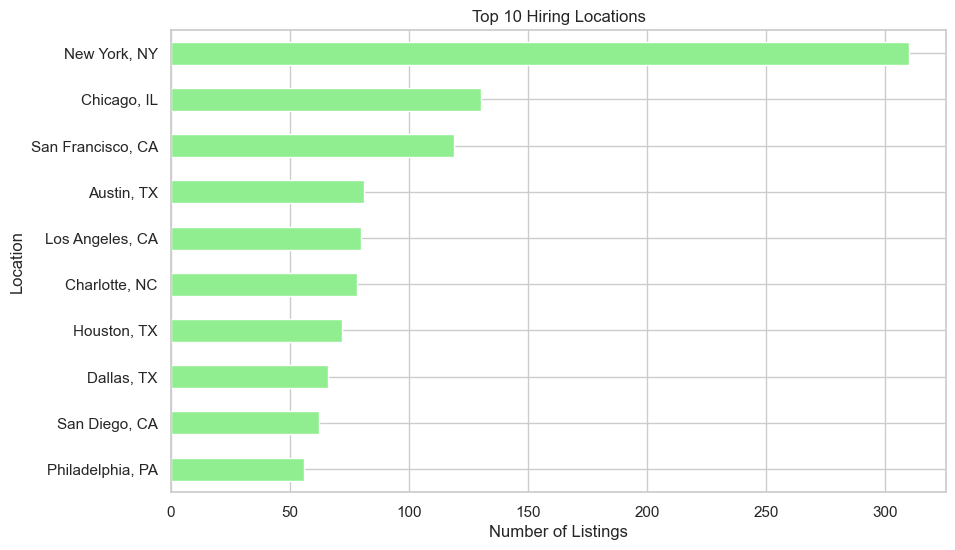

In [37]:
top_locations = df['Location'].value_counts().head(10)
top_locations.plot(kind='barh', figsize=(10,6), color='lightgreen')
plt.title("Top 10 Hiring Locations")
plt.xlabel("Number of Listings")
plt.gca().invert_yaxis()
plt.show()

# Top 10 Companies Hiring

c:\Users\khush\OneDrive\Desktop\sp-19 app\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


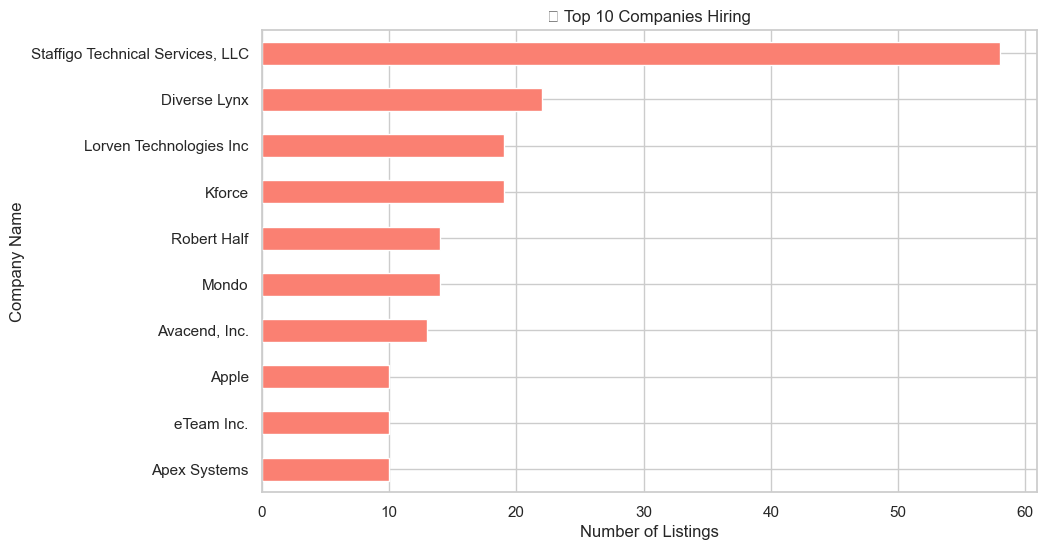

In [38]:
top_companies = df['Company Name'].value_counts().head(10)
top_companies.plot(kind='barh', figsize=(10,6), color='salmon')
plt.title("🏢 Top 10 Companies Hiring")
plt.xlabel("Number of Listings")
plt.gca().invert_yaxis()
plt.show()

# 2. How do company rating and job location impact average salaries?

# company Rating vs Avg Salary

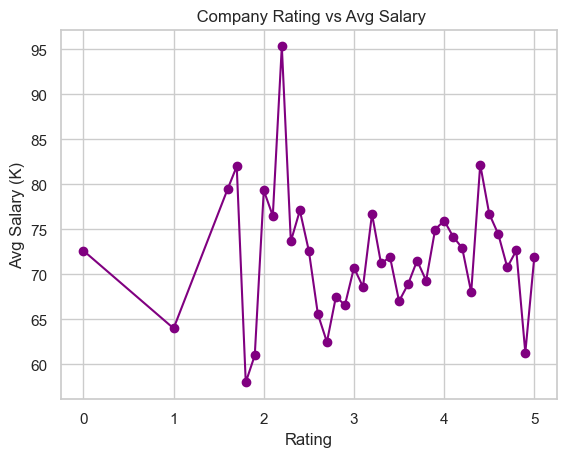

In [39]:
df['Rating'] = df['Rating'].replace(-1, 0)

rating_salary = df.groupby('Rating')['Avg Salary (K)'].mean().sort_index()
rating_salary.plot(kind='line', marker='o', color='purple')
plt.title(" Company Rating vs Avg Salary")
plt.xlabel("Rating")
plt.ylabel("Avg Salary (K)")
plt.grid(True)
plt.show()


# Top Paying Locations

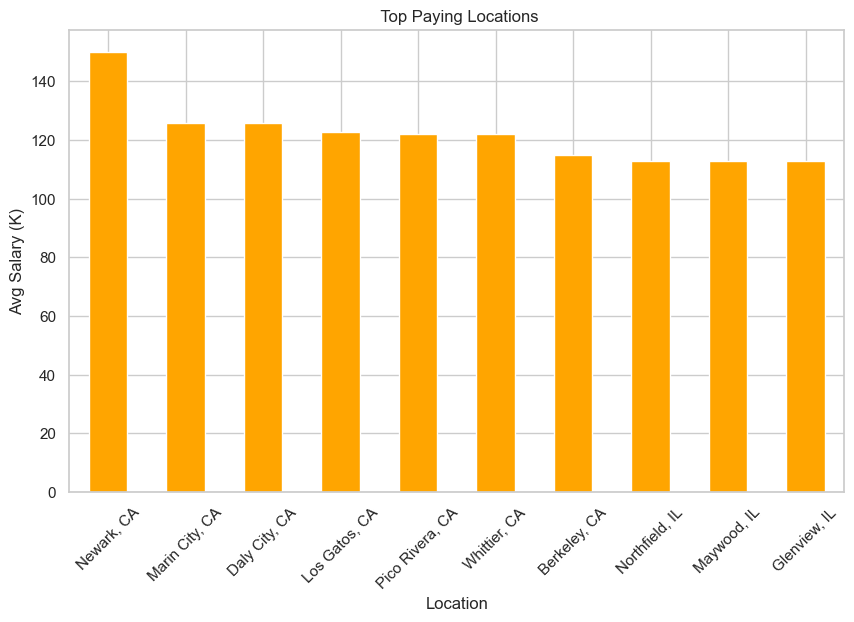

In [40]:
location_salary = df.groupby('Location')['Avg Salary (K)'].mean().sort_values(ascending=False).head(10)
location_salary.plot(kind='bar', figsize=(10,6), color='orange')
plt.title(" Top Paying Locations")
plt.ylabel("Avg Salary (K)")
plt.xticks(rotation=45)
plt.show()

# data processing 

In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#  Striping of  whitespace from column names
df.columns = df.columns.str.strip()

# --- Labeling of Encode 'Company Name' ---
if 'Company Name' in df.columns:
    company_encoder = LabelEncoder()
    df['Company_Encoded'] = company_encoder.fit_transform(df['Company Name'].fillna('Unknown'))

# --- One-hot encoding for selected categorical features ---
categorical_columns = ['Size', 'Revenue', 'Type of ownership', 'Industry', 'Sector']
available_categoricals = [col for col in categorical_columns if col in df.columns]
df = pd.get_dummies(df, columns=available_categoricals, drop_first=True)

# --- Simplifying of  Job Title ---
def simplify_job_title(title):
    title = str(title).lower()
    if 'senior' in title or 'sr' in title:
        return 'Senior Analyst'
    elif 'manager' in title:
        return 'Manager'
    elif 'intern' in title:
        return 'Intern'
    elif 'lead' in title:
        return 'Lead Analyst'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'engineer' in title:
        return 'Engineer'
    else:
        return 'Analyst'

if 'Job Title' in df.columns:
    df['Job Title Simplified'] = df['Job Title'].apply(simplify_job_title)
    df = pd.get_dummies(df, columns=['Job Title Simplified'], drop_first=True)

# --- 'Rating' ---
if 'Rating' in df.columns:
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    rating_imputer = SimpleImputer(strategy='mean')
    df['Rating'] = rating_imputer.fit_transform(df[['Rating']]).ravel()

# ---  'Easy Apply' ---
if 'Easy Apply' in df.columns:
    df['Easy Apply'] = df['Easy Apply'].map({'Yes': 1, 'No': 0}).fillna(0)

# --- Droping of  Irrelevant Columns ---
to_drop = ['Unnamed: 0', 'Job Title', 'Job Description', 'Company Name', 'Location', 'Headquarters', 'Competitors']
df.drop(columns=[col for col in to_drop if col in df.columns], inplace=True)

# --- Imputing of  remaining missing values ---
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df


,Salary Estimate,Rating,Founded,Easy Apply,Salary Estimate Cleaned,Min Salary (K),Max Salary (K),Avg Salary (K),Job City,Job State,...,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Job Title Simplified_Data Scientist,Job Title Simplified_Engineer,Job Title Simplified_Intern,Job Title Simplified_Lead Analyst,Job Title Simplified_Manager,Job Title Simplified_Senior Analyst
0,$37K-$66K (Glassdoor est.),3.2,1961,0.0,37-66,37.0,66.0,51.0,New York,NY,...,False,False,False,False,False,False,False,False,False,False
1,$37K-$66K (Glassdoor est.),3.8,1893,0.0,37-66,37.0,66.0,51.0,New York,NY,...,False,False,False,False,False,False,False,False,False,False
2,$37K-$66K (Glassdoor est.),3.4,2003,0.0,37-66,37.0,66.0,51.0,New York,NY,...,False,False,False,False,False,False,False,False,False,True
3,$37K-$66K (Glassdoor est.),4.1,2002,0.0,37-66,37.0,66.0,51.0,New York,NY,...,False,False,False,False,False,False,False,False,False,False
4,$37K-$66K (Glassdoor est.),3.9,2009,0.0,37-66,37.0,66.0,51.0,New York,NY,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,$78K-$104K (Glassdoor est.),2.5,-1,0.0,78-104,78.0,104.0,91.0,Denver,CO,...,False,False,False,False,False,False,False,False,False,False
2249,$78K-$104K (Glassdoor est.),2.9,1935,0.0,78-104,78.0,104.0,91.0,Centennial,CO,...,False,False,False,False,False,False,False,False,False,True
2250,$78K-$104K (Glassdoor est.),0.0,-1,0.0,78-104,78.0,104.0,91.0,Denver,CO,...,False,False,False,False,False,False,False,False,False,False
2251,$78K-$104K (Glassdoor est.),3.1,1984,0.0,78-104,78.0,104.0,91.0,Centennial,CO,...,False,False,False,False,False,False,False,False,False,False


In [42]:
if 'Salary Estimate' in df_imputed.columns:
    df = df_imputed.drop(columns=['Salary Estimate'])
    print(" Dropped 'Salary Estimate'")
else:
    print("Column 'Salary Estimate' not found — maybe it was already dropped?")
    df = df_imputed.copy()
df


 Dropped 'Salary Estimate'


,Rating,Founded,Easy Apply,Salary Estimate Cleaned,Min Salary (K),Max Salary (K),Avg Salary (K),Job City,Job State,HQ City,...,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Job Title Simplified_Data Scientist,Job Title Simplified_Engineer,Job Title Simplified_Intern,Job Title Simplified_Lead Analyst,Job Title Simplified_Manager,Job Title Simplified_Senior Analyst
0,3.2,1961,0.0,37-66,37.0,66.0,51.0,New York,NY,New York,...,False,False,False,False,False,False,False,False,False,False
1,3.8,1893,0.0,37-66,37.0,66.0,51.0,New York,NY,New York,...,False,False,False,False,False,False,False,False,False,False
2,3.4,2003,0.0,37-66,37.0,66.0,51.0,New York,NY,New York,...,False,False,False,False,False,False,False,False,False,True
3,4.1,2002,0.0,37-66,37.0,66.0,51.0,New York,NY,McLean,...,False,False,False,False,False,False,False,False,False,False
4,3.9,2009,0.0,37-66,37.0,66.0,51.0,New York,NY,New York,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2.5,-1,0.0,78-104,78.0,104.0,91.0,Denver,CO,Alpharetta,...,False,False,False,False,False,False,False,False,False,False
2249,2.9,1935,0.0,78-104,78.0,104.0,91.0,Centennial,CO,Centennial,...,False,False,False,False,False,False,False,False,False,True
2250,0.0,-1,0.0,78-104,78.0,104.0,91.0,Denver,CO,-1,...,False,False,False,False,False,False,False,False,False,False
2251,3.1,1984,0.0,78-104,78.0,104.0,91.0,Centennial,CO,West Chester,...,False,False,False,False,False,False,False,False,False,False


# Data Processing  and Data Modellinig for gsalary prediction

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

target_col = 'Avg Salary (K)'

if target_col in df_imputed.columns:
    #  Separation of  features and target
    X = df_imputed.drop(columns=[target_col])
    y = df_imputed[target_col].astype(float)

    #  Encoding of  categorical columns using get_dummies (One-Hot Encoding)
    X_encoded = pd.get_dummies(X, drop_first=True)

    if X_encoded.shape[1] == 0:
        raise ValueError(" No features left after encoding. Check your dataset.")

    print("Features after encoding:", X_encoded.columns.tolist())

    #  Scaling of numeric features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)

    # 4. Training/test  split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    print(" Data is preprocessed and ready for machine learning!")

else:
    print(f" Column '{target_col}' not found. Double-check your dataset.")



Features after encoding: ['Salary Estimate_$113K-$132K (Glassdoor est.)', 'Salary Estimate_$24K-$48K (Glassdoor est.)', 'Salary Estimate_$26K-$47K (Glassdoor est.)', 'Salary Estimate_$27K-$52K (Glassdoor est.)', 'Salary Estimate_$28K-$52K (Glassdoor est.)', 'Salary Estimate_$29K-$38K (Glassdoor est.)', 'Salary Estimate_$30K-$53K (Glassdoor est.)', 'Salary Estimate_$30K-$54K (Glassdoor est.)', 'Salary Estimate_$31K-$59K (Glassdoor est.)', 'Salary Estimate_$32K-$56K (Glassdoor est.)', 'Salary Estimate_$34K-$61K (Glassdoor est.)', 'Salary Estimate_$35K-$42K (Glassdoor est.)', 'Salary Estimate_$35K-$45K (Glassdoor est.)', 'Salary Estimate_$35K-$67K (Glassdoor est.)', 'Salary Estimate_$36K-$67K (Glassdoor est.)', 'Salary Estimate_$37K-$44K (Glassdoor est.)', 'Salary Estimate_$37K-$66K (Glassdoor est.)', 'Salary Estimate_$37K-$68K (Glassdoor est.)', 'Salary Estimate_$37K-$70K (Glassdoor est.)', 'Salary Estimate_$38K-$68K (Glassdoor est.)', 'Salary Estimate_$40K-$72K (Glassdoor est.)', 'Salar

# Linear Regression  Model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R2 Score:", r2_score(y_test, y_pred))


RMSE: 1.1228452267101083
R2 Score: 0.9979418304697586


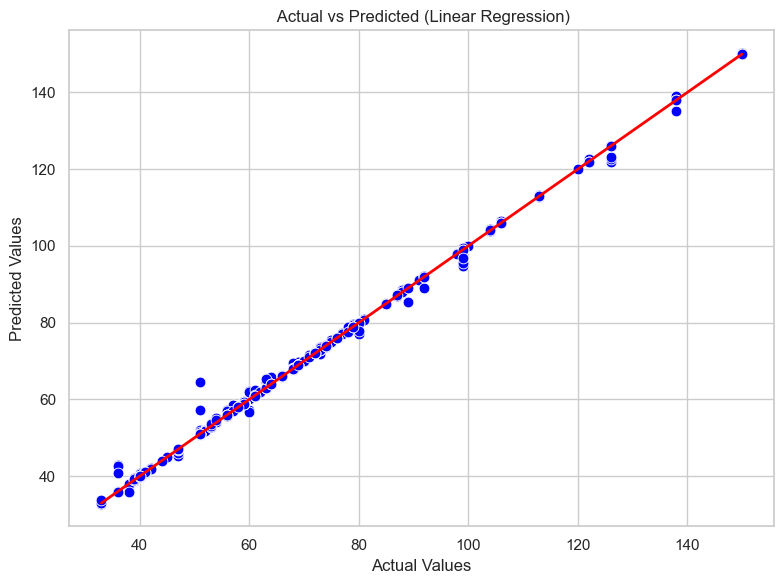

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(" Actual vs Predicted (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


# RandomForestRegressor & GradientBoostingRegressor

In [50]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd


In [51]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    return {
        'Model': model.__class__.__name__,
        'R2 Score': round(r2, 4),
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    }


In [53]:
models = [
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    SVR()
]

results = []

for model in models:
    result = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append(result)

results_df = pd.DataFrame(results)
print(results_df)


                       Model  R2 Score     RMSE      MAE
0      RandomForestRegressor    0.9996   0.4776   0.0624
1  GradientBoostingRegressor    0.9188   7.0540   6.1089
2                        SVR    0.0555  24.0533  17.4822


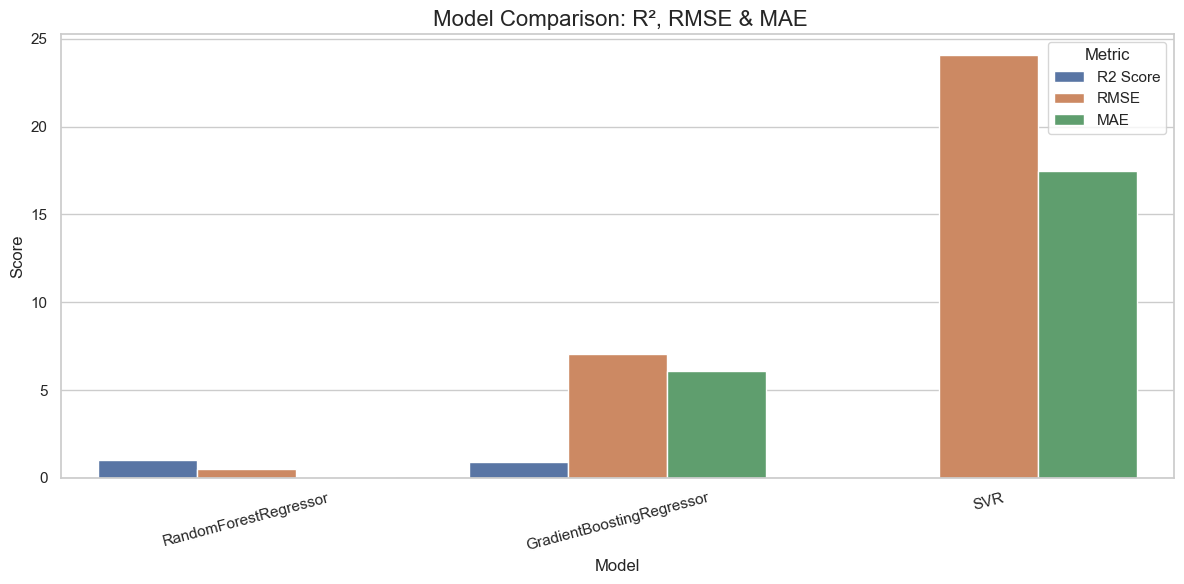

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting of  Seaborn style
sns.set(style="whitegrid")

# Setting of figure size
plt.figure(figsize=(12, 6))

# Melting of the dataframe for easier plotting
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Ploting of the barplot
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')



plt.title(" Model Comparison: R², RMSE & MAE", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=15)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


In [56]:
from sklearn.ensemble import RandomForestRegressor
import joblib

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

joblib.dump(rf, 'rf_model.pkl')
print(" Model saved successfully!")



 Model saved successfully!


In [57]:
import os

downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "rf_model.pkl")
joblib.dump(rf, downloads_path)
print(f" Model saved to: {downloads_path}")


 Model saved to: C:\Users\khush\Downloads\rf_model.pkl


In [24]:
df.to_csv('final_cleaned_jobs.csv', index=False)
df

,Rating,Founded,Easy Apply,Salary Estimate Cleaned,Min Salary (K),Max Salary (K),Avg Salary (K),Job City,Job State,HQ City,...,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Job Title Simplified_Data Scientist,Job Title Simplified_Engineer,Job Title Simplified_Intern,Job Title Simplified_Lead Analyst,Job Title Simplified_Manager,Job Title Simplified_Senior Analyst
0,3.2,1961,0.0,37-66,37.0,66.0,51.0,New York,NY,New York,...,False,False,False,False,False,False,False,False,False,False
1,3.8,1893,0.0,37-66,37.0,66.0,51.0,New York,NY,New York,...,False,False,False,False,False,False,False,False,False,False
2,3.4,2003,0.0,37-66,37.0,66.0,51.0,New York,NY,New York,...,False,False,False,False,False,False,False,False,False,True
3,4.1,2002,0.0,37-66,37.0,66.0,51.0,New York,NY,McLean,...,False,False,False,False,False,False,False,False,False,False
4,3.9,2009,0.0,37-66,37.0,66.0,51.0,New York,NY,New York,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2.5,-1,0.0,78-104,78.0,104.0,91.0,Denver,CO,Alpharetta,...,False,False,False,False,False,False,False,False,False,False
2249,2.9,1935,0.0,78-104,78.0,104.0,91.0,Centennial,CO,Centennial,...,False,False,False,False,False,False,False,False,False,True
2250,0.0,-1,0.0,78-104,78.0,104.0,91.0,Denver,CO,-1,...,False,False,False,False,False,False,False,False,False,False
2251,3.1,1984,0.0,78-104,78.0,104.0,91.0,Centennial,CO,West Chester,...,False,False,False,False,False,False,False,False,False,False


In [58]:
import os

downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "final_cleaned_jobs.csv")
df.to_csv(downloads_path, index=False)
print(f" File saved to: {downloads_path}")


 File saved to: C:\Users\khush\Downloads\final_cleaned_jobs.csv


# deployment of model

In [60]:
# app.py
import streamlit as st
import pandas as pd
import pickle

# Loading of  model and data 

import joblib
model = joblib.load('rf_model.pkl')  

df = pd.read_csv('final_cleaned_jobs.csv')

# Streamlit UI
st.title("💼 G-19 Data Analyst Salary Predictor")

location = st.selectbox(" Select Location", sorted(df['Job City'].unique()))
rating = st.slider(" Company Rating", 0.0, 5.0, 3.0)



if st.button("Predict Salary"):

    input_data = pd.DataFrame([[location, rating]], columns=['Job City', 'Rating'])



    prediction = model.predict(input_data)[0]
    st.success(f" Estimated Salary: ₹{round(prediction, 2)}K")



2025-04-07 16:30:34.995 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:30:35.297 
  command:

    streamlit run c:\Users\khush\OneDrive\Desktop\sp-19 app\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-07 16:30:35.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:30:35.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:30:35.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:30:35.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:30:35.305 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:30:35.306 

 # Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5, scoring='r2', n_jobs=-1)
search.fit(X_train, y_train)

best_rf = search.best_estimator_


#  Feature Selection

🧾 Columns: ['Rating', 'Founded', 'Easy Apply', 'Salary Estimate Cleaned', 'Min Salary (K)', 'Max Salary (K)', 'Avg Salary (K)', 'Job City', 'Job State', 'HQ City', 'HQ State', 'Skill_Python', 'Skill_Excel', 'Skill_SQL', 'Skill_R', 'Skill_Tableau', 'Skill_Power BI', 'Skill_Machine Learning', 'Company_Encoded', 'Size_10000+ employees', 'Size_1001 to 5000 employees', 'Size_201 to 500 employees', 'Size_5001 to 10000 employees', 'Size_501 to 1000 employees', 'Size_51 to 200 employees', 'Size_Unknown', 'Revenue_$1 to $5 million (USD)', 'Revenue_$10 to $25 million (USD)', 'Revenue_$10+ billion (USD)', 'Revenue_$100 to $500 million (USD)', 'Revenue_$2 to $5 billion (USD)', 'Revenue_$25 to $50 million (USD)', 'Revenue_$5 to $10 billion (USD)', 'Revenue_$5 to $10 million (USD)', 'Revenue_$50 to $100 million (USD)', 'Revenue_$500 million to $1 billion (USD)', 'Revenue_Less than $1 million (USD)', 'Revenue_Unknown / Non-Applicable', 'Type of ownership_Company - Private', 'Type of ownership_Company

C:\Users\khush\AppData\Local\Temp\ipykernel_9396\2345167682.py:67: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\khush\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


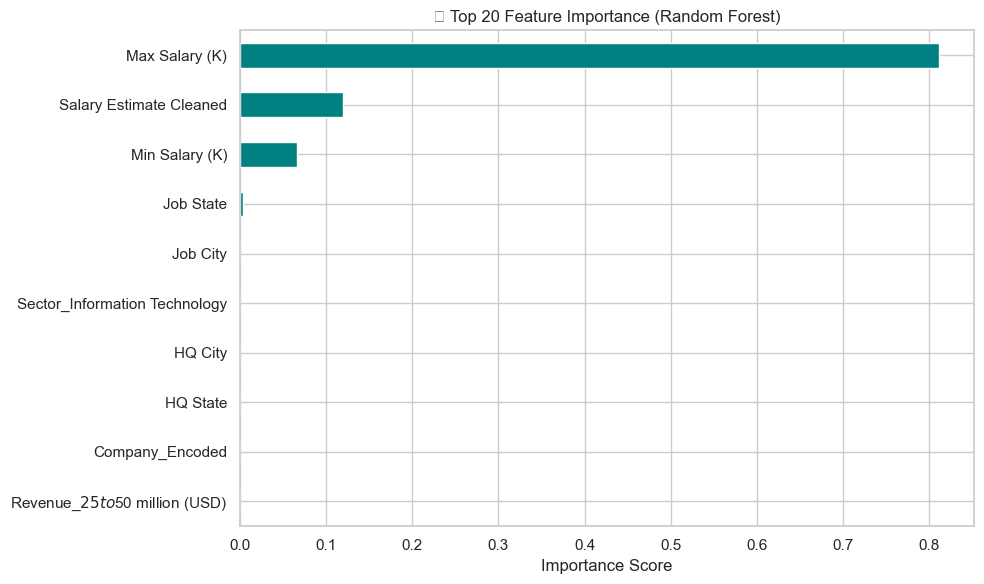

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load your data
df = pd.read_csv("final_cleaned_jobs.csv")

# Print all column names to double check
print("🧾 Columns:", df.columns.tolist())

# Handle missing values (if any)
df = df.fillna(0)

# Encode categorical columns (if any)
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Define features and target
X = df.drop('Avg Salary (K)', axis=1)
y = df['Avg Salary (K)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest with hyperparameter tuning
rf = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit the model
search.fit(X_train, y_train)

# Best model
best_rf = search.best_estimator_

# Feature Importance Plot
importances = best_rf.feature_importances_
# Sort and select top 20
top_n = 10
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)[:top_n]


# Plot
plt.figure(figsize=(10, 6))
feat_imp.sort_values().plot(kind='barh', color='teal')
plt.title("🧠 Top 20 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
